<a href="https://colab.research.google.com/github/IntoKanto/data/blob/main/TieliikenneOnnettomuudet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tehtävä 1

## Tieliikenneonnettomuudet vuodelta 2023
Tässä tehtävässä käydään läpi Väyläviraston tarjoamaa avointa dataa.
Data on haettu https://ava.vaylapilvi.fi/ava/Tie/Tieliikenneonnettomuudet osoitteesta.
Tehtäväannossa kerrottiin, että saatavilla on vuoden 2022 tilasto. Tilastoja selatessa huomattiin että vuoden 2023 tilasto on myös saatavilla.





In [ ]:
# avataan yhteys Google Driveen ja etsitään sieltä oikea data
# tieliikenneonnettomuudet_2023

from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/onnettomuudet23
%ls


Mounted at /gdrive
/gdrive/MyDrive/onnettomuudet23
tieliikenneonnettomuudet_2023_onnettomuudet.csv
tieliikenneonnettomuudet_2023_osalliset.csv
tieliikenneonnettomuudet-tietosisallon-kuvaus_2022_avoindata.pdf


In [ ]:
# tuodaan pandas, matplotlib ja seaborn kirjastot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

""" tallennetaan data df muuttujaan ja tarkistetaan viisi ensimmäistä riviä
    df.head()   -> tulostaa viisi ensimmäistä riviä
    df.tail()   -> tulostaa viisi viimeistä riviä
    df[5:10]    -> tulostaa rivit 5-9
"""
df = pd.read_csv('tieliikenneonnettomuudet_2023_onnettomuudet.csv', sep=';')
pd.options.display.max_columns = None

df.head()

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,x-koordinaatti,y-koordinaatti,Liikennevalot,ELY-keskus,Maakunta,Kunta,Katuosoite,Vuosi,Kuukausi,Onnettomyystyyppi,Onnettomuustyyppi nro,Vakavuus,Osallisten lkm,Onnettomuusluokka,Raskaan liikenteen onnettomuus,Tietyö,Onnettomuuspaikka,Liittymäjärjestelyt,Viikonpäivä,Pinta,Valoisuus,Lämpötila,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas,Näkemä% yli 150,Näkemä% yli 300,Näkemä% yli 450,Näkemän pituus
0,620587,Kunta,-,-,-,-,-,383804.0,6677861.0,-,NaN,NaN,NaN,ILKANTIE X METSÄLÄNTIE,2023,1,vastakkaiset ajosuunnat muu törmäys käännyttäe...,36,Loukkaantumiseen johtanut,2,kääntymisonnettomuus,ei,ei,ajorata,kärkikolmio,su,jäinen,tie valaistu,2,kirkas,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN
1,620588,Väylävirasto,20.6.2500,0,20,6,2500,444876.0,7224084.0,-,Pohjois-Pohjanmaan ELY,Pohjois-Pohjanmaa,Oulu,Kuusamontie,2023,1,ohitus,0,Ei henkilövahinkoja,2,ohitusonnettomuus,ei,ei,ajorata,linjaonnettomuus,su,luminen,pimeä (valaisematon),−1,lumisade,80.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,3 970,494,99.0,92.0,68.0,NaN
2,620589,Väylävirasto,261/6/2322,0,261,6,2322,281069.0,6857041.0,-,Pirkanmaan ELY,Pirkanmaa,Ikaalinen,JÄMIJÄRVENTIE,2023,1,eläinonnettomuus,90,Ei henkilövahinkoja,2,hirvionnettomuus,ei,ei,ajorata,linjaonnettomuus,su,-,pimeä (valaisematon),−5,pilvipouta,80.0,-,kestopäällyste,Ib,Seututie,Ei tasoristeystä,ei,1 512,132,93.0,49.0,22.0,NaN
3,620590,Väylävirasto,65/6/436,0,65,6,436,317770.0,6847910.0,-,Pirkanmaan ELY,Pirkanmaa,Ylöjärvi,UUSI-KURUNTIE,2023,1,eläinonnettomuus,90,Ei henkilövahinkoja,2,hirvionnettomuus,ei,ei,ajorata,linjaonnettomuus,su,jäinen,pimeä (valaisematon),−5,kirkas,80.0,-,kestopäällyste,Is,Kantatie,Ei tasoristeystä,ei,3 873,279,73.0,31.0,8.0,NaN
4,620591,Väylävirasto,120/4/1101,0,120,4,1101,378049.0,6684830.0,-,Uudenmaan ELY,Uusimaa,Vantaa,Vihdintie,2023,1,suistuminen vasemmalle suoralla,81,Ei henkilövahinkoja,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,su,-,pimeä (valaisematon),−1,raesade,80.0,-,kestopäällyste,Is,Seututie,Ei tasoristeystä,ei,9 027,418,85.0,48.0,14.0,NaN


In [ ]:
# Tarkistetaan montako riviä ja saraketta datassa on "df.shape"

df.shape

(9091, 43)

In [ ]:
# Tarkistetaan kaikkien sarakkeiden otsikot ja arvojen lkm
df.count()

,0
OnnettomuusID,9091
Tienpitäjä,9091
Tieosoite,9091
Ajorata,9091
Tie,9091
Osa,9091
Etaisyys,9091
x-koordinaatti,9087
y-koordinaatti,9087
Liikennevalot,9091


In [ ]:
# Tarkistetaan puuttuvien arvojen lkm kuussakin sarakkeessa
df.isnull().sum()

,0
OnnettomuusID,0
Tienpitäjä,0
Tieosoite,0
Ajorata,0
Tie,0
Osa,0
Etaisyys,0
x-koordinaatti,4
y-koordinaatti,4
Liikennevalot,0


In [ ]:
# Tarkistetaan sarakkeiden ja arvojen lkm, tietotyypit

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OnnettomuusID                   9091 non-null   int64  
 1   Tienpitäjä                      9091 non-null   object 
 2   Tieosoite                       9091 non-null   object 
 3   Ajorata                         9091 non-null   object 
 4   Tie                             9091 non-null   object 
 5   Osa                             9091 non-null   object 
 6   Etaisyys                        9091 non-null   object 
 7   x-koordinaatti                  9087 non-null   float64
 8   y-koordinaatti                  9087 non-null   float64
 9   Liikennevalot                   9091 non-null   object 
 10  ELY-keskus                      5966 non-null   object 
 11  Maakunta                        5191 non-null   object 
 12  Kunta                           51

In [ ]:
"""
Tilastolliset tunnusluvut saadaan describe funktiolla
  count   -> rivien määrä
  mean    -> keskiarvo
  std     -> keskihajonta
  min     -> pienin arvo
  25%     -> 25% arvoista
  50%     -> 50% arvoista
  75%     -> 75% arvoista
  max     -> suurin arvo
"""
df.describe()

,OnnettomuusID,x-koordinaatti,y-koordinaatti,Vuosi,Kuukausi,Onnettomuustyyppi nro,Osallisten lkm,Nopeusrajoitus,Näkemä% yli 150,Näkemä% yli 300,Näkemä% yli 450
count,9091.000000,9087.000000,9.087000e+03,9091.0,9091.000000,9091.000000,9091.000000,8989.000000,3712.000000,3712.000000,3712.000000
mean,625493.733583,386015.468361,6.876269e+06,2023.0,6.939831,54.207788,1.606314,62.279453,95.219828,72.893050,47.194504
std,2821.197493,106624.698744,1.950603e+05,0.0,3.496660,34.442724,0.845749,22.395964,10.755741,25.215923,27.051980
min,620587.000000,185996.000000,6.638684e+06,2023.0,1.000000,0.000000,0.000000,10.000000,12.000000,0.000000,0.000000
25%,623064.500000,309261.500000,6.711369e+06,2023.0,4.000000,13.000000,1.000000,40.000000,97.000000,59.000000,27.000000
50%,625496.000000,385420.000000,6.821325e+06,2023.0,7.000000,62.000000,2.000000,60.000000,100.000000,80.500000,48.000000
75%,627903.500000,437710.000000,6.989472e+06,2023.0,10.000000,86.000000,2.000000,80.000000,100.000000,93.000000,68.000000
max,633338.000000,711953.000000,7.736926e+06,2023.0,12.000000,99.000000,17.000000,120.000000,100.000000,100.000000,100.000000


In [ ]:
""" Tilastollisia tunnuslukuja voidaan tarkistaa tietylle sarakkeelle
  Osallisten lkm keskiarvo on 1.6,

"""
dftietty = df['Osallisten lkm'].describe()

# Suomennetaan indeksit
tunnusluvut = ['lukumäärä', 'keskiarvo', 'keskihajonta', 'pienin', 'alakvartiili', 'mediaani', 'yläkvartiili', 'suurin']
dftietty.index = tunnusluvut
dftietty

,Osallisten lkm
lukumäärä,9091.000000
keskiarvo,1.606314
keskihajonta,0.845749
pienin,0.000000
alakvartiili,1.000000
mediaani,2.000000
yläkvartiili,2.000000
suurin,17.000000


In [ ]:
# Tarkistetaan tienpitäjien mahdollisia arvoja
df['Tienpitäjä'].unique()
# Kunta, Väylävirasto, Muu


array(['Kunta', 'Väylävirasto', 'Muu'], dtype=object)

In [ ]:
# Tarksitetaan Vakavuuksien mahdollisia arvoja
df['Vakavuus'].unique()
# Loukkaantumiseen johtanut, Ei henkilövahinkoja, Koulemaan johtanut

array(['Loukkaantumiseen johtanut', 'Ei henkilövahinkoja',
       'Kuolemaan johtanut'], dtype=object)

In [ ]:
# Tarkastetaan sääolosuhteita
df['Sää'].unique()
# Kirkas, lumisade, pilvipouta, raesade, vesisade, räntäsade, sumu

array(['kirkas', 'lumisade', 'pilvipouta', 'raesade', 'vesisade',
       'räntäsade', 'sumu'], dtype=object)

In [ ]:
# Tarkastetaan onnettomuus paikkoja
df['Onnettomuuspaikka'].unique()
# ajorata, suojatie, silta, pysäköintialue tai piha, eritasoliittymän ramppi, kävely- ja pyörätie, linja-autopysäkki, muu

array(['ajorata', 'suojatie', 'silta', '-', 'pysäköintialue tai piha',
       'eritasoliittymän ramppi', 'kävely- ja pyörätie', 'muu',
       'linja-autopysäkki'], dtype=object)

In [ ]:
# Tarkastetaan ajopintoja
df['Pinta'].unique()
# jäinen, luminen, urissa vettä, paljas, mäerkä, ajourat paljaat, paljas kuiva, sohjoinen

array(['jäinen', 'luminen', '-', 'urissa vettä', 'paljas, märkä',
       'ajourat paljaat', 'paljas, kuiva', 'sohjoinen'], dtype=object)

In [ ]:
# Tarkastetaan Nopeusrajoituksia
df['Nopeusrajoitus'].unique()
# 10, 20, 30, 40, 50, 60, 70, 80, 100, 120, nan

array([ 40.,  80.,  50.,  60., 100.,  70.,  30.,  nan,  20.,  10., 120.])

In [ ]:
# Tarksitetaan viisi onnettomuutta, joissa oli suurin lkm osallisia
#
df.nlargest(5, 'Osallisten lkm')

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,x-koordinaatti,y-koordinaatti,Liikennevalot,ELY-keskus,Maakunta,Kunta,Katuosoite,Vuosi,Kuukausi,Onnettomyystyyppi,Onnettomuustyyppi nro,Vakavuus,Osallisten lkm,Onnettomuusluokka,Raskaan liikenteen onnettomuus,Tietyö,Onnettomuuspaikka,Liittymäjärjestelyt,Viikonpäivä,Pinta,Valoisuus,Lämpötila,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas,Näkemä% yli 150,Näkemä% yli 300,Näkemä% yli 450,Näkemän pituus
1837,622590,Väylävirasto,4/367/4715,1,4,367,4715,429623.0,7209388.0,-,Pohjois-Pohjanmaan ELY,Pohjois-Pohjanmaa,Oulu,VT4,2023,3,peräänajo jarruttavaan ajoneuvoon,6,Loukkaantumiseen johtanut,17,peräänajo-onnettomuus,kyllä,ei,ajorata,linjaonnettomuus,pe,luminen,päivänvalo,−5,lumisade,80.0,Tieto puuttuu,kestopäällyste,Ise,Valtatie,Ei tasoristeystä,ei,42 707,2 683,100.0,100.0,92.0,NaN
1900,622656,Väylävirasto,3/134/3115,1,3,134,3115,328368.0,6810836.0,-,Pirkanmaan ELY,Pirkanmaa,Lempäälä,VT 3 KULJUN LIITTYMÄ,2023,3,peräänajo jarruttavaan ajoneuvoon,6,Ei henkilövahinkoja,13,peräänajo-onnettomuus,kyllä,ei,ajorata,linjaonnettomuus,ma,luminen,päivänvalo,−5,lumisade,80.0,Tieto puuttuu,kestopäällyste,Ise,Valtatie,Ei tasoristeystä,ei,41 911,3 300,100.0,89.0,70.0,NaN
1826,622579,Väylävirasto,4/364/5842,1,4,364,5842,430953.0,7201290.0,-,Pohjois-Pohjanmaan ELY,Pohjois-Pohjanmaa,Kempele,POHJANTIE,2023,3,peräänajo jarruttavaan ajoneuvoon,6,Ei henkilövahinkoja,11,peräänajo-onnettomuus,ei,ei,ajorata,linjaonnettomuus,pe,luminen,päivänvalo,−5,lumisade,80.0,Tieto puuttuu,kestopäällyste,Ise,Valtatie,Ei tasoristeystä,ei,25 482,1 761,100.0,100.0,100.0,674
2171,622956,Väylävirasto,101/7/1130,1,101,7,1130,387303.0,6680368.0,-,Uudenmaan ELY,Uusimaa,Helsinki,KEHÄ 1 ITÄÄN,2023,4,peräänajo jarruttavaan ajoneuvoon,6,Ei henkilövahinkoja,8,peräänajo-onnettomuus,ei,ei,ajorata,linjaonnettomuus,ti,"paljas, kuiva",päivänvalo,5,kirkas,80.0,Tieto puuttuu,kestopäällyste,Ise,Seututie,Ei tasoristeystä,ei,70 823,3 068,NaN,NaN,NaN,NaN
7610,628764,Kunta,-,-,-,-,-,322538.0,6825057.0,-,NaN,NaN,NaN,POSSIJÄRVENKATU 6,2023,11,muu onnettomuus,99,Ei henkilövahinkoja,8,muu onnettomuus,kyllä,ei,pysäköintialue tai piha,linjaonnettomuus,pe,jäinen,päivänvalo,−4,pilvipouta,NaN,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.nsmallest(10,'Osallisten lkm')

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,x-koordinaatti,y-koordinaatti,Liikennevalot,ELY-keskus,Maakunta,Kunta,Katuosoite,Vuosi,Kuukausi,Onnettomyystyyppi,Onnettomuustyyppi nro,Vakavuus,Osallisten lkm,Onnettomuusluokka,Raskaan liikenteen onnettomuus,Tietyö,Onnettomuuspaikka,Liittymäjärjestelyt,Viikonpäivä,Pinta,Valoisuus,Lämpötila,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas,Näkemä% yli 150,Näkemä% yli 300,Näkemä% yli 450,Näkemän pituus
18,620610,Kunta,-,-,-,-,-,326086.0,6818716.0,-,NaN,NaN,NaN,Ilmailunkatu,2023,1,kääntyminen vasemmalle toisen eteen tai kylkeen,52,Ei henkilövahinkoja,0,risteämisonnettomuus,ei,ei,ajorata,kärkikolmio,su,jäinen,päivänvalo,−1,pilvipouta,60.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,ei,NaN,NaN,NaN,NaN,NaN,NaN
26,620619,Kunta,-,-,-,-,-,388072.0,7294347.0,-,Pohjois-Pohjanmaan ELY,NaN,NaN,Koivuharjunkatu,2023,1,suistuminen oikealle suoralla,80,Ei henkilövahinkoja,0,muu onnettomuus,ei,ei,ajorata,linjaonnettomuus,ma,jäinen,tie valaistu,−15,pilvipouta,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN
37,620630,Kunta,-,-,-,-,-,383974.0,6678562.0,toiminnassa,NaN,NaN,NaN,ELIEL SAARISENTIE X NUIJAMIESTENTIE,2023,1,peruutusonnettomuus,96,Ei henkilövahinkoja,0,muu onnettomuus,ei,ei,ajorata,tasa-arvo,ma,"paljas, märkä",tie valaistu,−2,pilvipouta,50.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN
38,620631,Kunta,-,-,-,-,-,239460.0,6711204.0,-,NaN,NaN,NaN,PUOLALANKATU,2023,1,suistuminen vasemmalle suoralla,81,Ei henkilövahinkoja,0,muu onnettomuus,ei,ei,ajorata,linjaonnettomuus,ma,"paljas, kuiva",tie valaistu,−3,kirkas,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN
48,620641,Kunta,-,-,-,-,-,380237.0,7106807.0,-,Etelä-Pohjanmaan ELY,NaN,NaN,Ratakatu,2023,1,ajo risteäviä ajosuuntia suoraan,40,Ei henkilövahinkoja,0,risteämisonnettomuus,ei,ei,ajorata,muu risteys,ti,jäinen,päivänvalo,−3,pilvipouta,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN
67,620665,Kunta,-,-,-,-,-,238776.0,6710799.0,toiminnassa,NaN,NaN,NaN,Puistokatu x Puutarhakatu,2023,1,ajo risteäviä ajosuuntia suoraan,40,Ei henkilövahinkoja,0,risteämisonnettomuus,ei,ei,ajorata,liikennevalot,ke,jäinen,tie valaistu,−3,kirkas,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN
68,620666,Kunta,-,-,-,-,-,227573.0,7008682.0,-,Keski-Suomen ELY,NaN,NaN,Wolffintie 36,2023,1,peräänajo jarruttavaan ajoneuvoon,6,Ei henkilövahinkoja,0,peräänajo-onnettomuus,ei,ei,ajorata,linjaonnettomuus,ke,jäinen,päivänvalo,−6,kirkas,50.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,ei,NaN,NaN,NaN,NaN,NaN,NaN
89,620688,Kunta,-,-,-,-,-,564228.0,6769473.0,-,NaN,NaN,NaN,Kauppakatu x mutkakatu,2023,1,muu törmäys käännyttäessä vasemmalle,13,Ei henkilövahinkoja,0,kääntymisonnettomuus,ei,ei,-,kärkikolmio,to,jäinen,hämärä,−8,kirkas,50.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN
95,620694,Kunta,-,-,-,-,-,221632.0,6827852.0,-,NaN,NaN,NaN,Esivallankatu X Tapionkatu,2023,1,ajo risteäviä ajosuuntia suoraan,40,Ei henkilövahinkoja,0,risteämisonnettomuus,ei,ei,ajorata,tasa-arvo,to,luminen,päivänvalo,−5,pilvipouta,30.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,ei,NaN,NaN,NaN,NaN,NaN,NaN
104,620705,Kunta,-,-,-,-,-,388382.0,7293135.0,-,Pohjois-Pohjanmaan ELY,NaN,NaN,Asemakatu 1,2023,1,"muu samat ajosuunnat, ei kääntymistä",9,Ei henkilövahinkoja,0,muu onnettomuus,ei,ei,ajorata,kärkikolmio,pe,jäinen,tie valaistu,−11,kirkas,50.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Listataan kaikki onnettomuusluokat for silmukalla

for x in df['Onnettomuusluokka'].unique():
  print(x)

kääntymisonnettomuus
ohitusonnettomuus
hirvionnettomuus
yksittäisonnettomuus
risteämisonnettomuus
jalankulkijaonnettomuus
kohtaamisonnettomuus
muu onnettomuus
peräänajo-onnettomuus
mopedionnettomuus
muu eläinonnettomuus
polkupyöräonnettomuus
peuraonnettomuus


### Muuntaminen

In [ ]:
"""
Tiputetaan tarpeettomat sarakkeet datasta,
tässä tehtävässä ei tulla käyttämään x- ja y-koordinaatteja ja Näkemien suurien puutosten takia poistetaan nekin
"""
df1 = df.drop(['x-koordinaatti', 'y-koordinaatti', 'Näkemä% yli 150', 'Näkemä% yli 300', 'Näkemä% yli 450', 'Näkemän pituus'], axis=1)
df1.head()

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,Liikennevalot,ELY-keskus,Maakunta,Kunta,Katuosoite,Vuosi,Kuukausi,Onnettomyystyyppi,Onnettomuustyyppi nro,Vakavuus,Osallisten lkm,Onnettomuusluokka,Raskaan liikenteen onnettomuus,Tietyö,Onnettomuuspaikka,Liittymäjärjestelyt,Viikonpäivä,Pinta,Valoisuus,Lämpötila,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas
0,620587,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,ILKANTIE X METSÄLÄNTIE,2023,1,vastakkaiset ajosuunnat muu törmäys käännyttäe...,36,Loukkaantumiseen johtanut,2,kääntymisonnettomuus,ei,ei,ajorata,kärkikolmio,su,jäinen,tie valaistu,2,kirkas,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
1,620588,Väylävirasto,20.6.2500,0,20,6,2500,-,Pohjois-Pohjanmaan ELY,Pohjois-Pohjanmaa,Oulu,Kuusamontie,2023,1,ohitus,0,Ei henkilövahinkoja,2,ohitusonnettomuus,ei,ei,ajorata,linjaonnettomuus,su,luminen,pimeä (valaisematon),−1,lumisade,80.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,3 970,494
2,620589,Väylävirasto,261/6/2322,0,261,6,2322,-,Pirkanmaan ELY,Pirkanmaa,Ikaalinen,JÄMIJÄRVENTIE,2023,1,eläinonnettomuus,90,Ei henkilövahinkoja,2,hirvionnettomuus,ei,ei,ajorata,linjaonnettomuus,su,-,pimeä (valaisematon),−5,pilvipouta,80.0,-,kestopäällyste,Ib,Seututie,Ei tasoristeystä,ei,1 512,132
3,620590,Väylävirasto,65/6/436,0,65,6,436,-,Pirkanmaan ELY,Pirkanmaa,Ylöjärvi,UUSI-KURUNTIE,2023,1,eläinonnettomuus,90,Ei henkilövahinkoja,2,hirvionnettomuus,ei,ei,ajorata,linjaonnettomuus,su,jäinen,pimeä (valaisematon),−5,kirkas,80.0,-,kestopäällyste,Is,Kantatie,Ei tasoristeystä,ei,3 873,279
4,620591,Väylävirasto,120/4/1101,0,120,4,1101,-,Uudenmaan ELY,Uusimaa,Vantaa,Vihdintie,2023,1,suistuminen vasemmalle suoralla,81,Ei henkilövahinkoja,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,su,-,pimeä (valaisematon),−1,raesade,80.0,-,kestopäällyste,Is,Seututie,Ei tasoristeystä,ei,9 027,418


In [ ]:
# Tarksitetaan sarakkeiden otsikot
df1.columns

Index(['OnnettomuusID', 'Tienpitäjä', 'Tieosoite', 'Ajorata', 'Tie', 'Osa',
       'Etaisyys', 'Liikennevalot', 'ELY-keskus', 'Maakunta ', 'Kunta',
       'Katuosoite', 'Vuosi', 'Kuukausi', 'Onnettomyystyyppi',
       'Onnettomuustyyppi nro', 'Vakavuus', 'Osallisten lkm',
       'Onnettomuusluokka', 'Raskaan liikenteen onnettomuus', 'Tietyö',
       'Onnettomuuspaikka', 'Liittymäjärjestelyt', 'Viikonpäivä', 'Pinta',
       'Valoisuus', 'Lämpötila', 'Sää', 'Nopeusrajoitus', 'Verkollinen asema',
       'Päällyste', 'Talvihoitoluokitus', 'Toiminallinen luokka korjattu',
       'Rautatie', 'Taajama', 'KVL', 'KVL raskas'],
      dtype='object')

In [ ]:
df1.isnull().sum()

,0
OnnettomuusID,0
Tienpitäjä,0
Tieosoite,0
Ajorata,0
Tie,0
Osa,0
Etaisyys,0
Liikennevalot,0
ELY-keskus,3125
Maakunta,3900


In [ ]:
# Vaihdetaan viikonpäivien lyhenteet
df1['Viikonpäivä'].replace({'ma':'Maanantai', 'ti':'Tiistai',
                            'ke':'Keskiviikko', 'to':'Torstai',
                            'pe':'Perjantai', 'la':'Lauantai',
                            'su':'Sunnuntai'},inplace=True)
df1

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,Liikennevalot,ELY-keskus,Maakunta,Kunta,Katuosoite,Vuosi,Kuukausi,Onnettomyystyyppi,Onnettomuustyyppi nro,Vakavuus,Osallisten lkm,Onnettomuusluokka,Raskaan liikenteen onnettomuus,Tietyö,Onnettomuuspaikka,Liittymäjärjestelyt,Viikonpäivä,Pinta,Valoisuus,Lämpötila,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas
0,620587,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,ILKANTIE X METSÄLÄNTIE,2023,1,vastakkaiset ajosuunnat muu törmäys käännyttäe...,36,Loukkaantumiseen johtanut,2,kääntymisonnettomuus,ei,ei,ajorata,kärkikolmio,Sunnuntai,jäinen,tie valaistu,2,kirkas,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
1,620588,Väylävirasto,20.6.2500,0,20,6,2500,-,Pohjois-Pohjanmaan ELY,Pohjois-Pohjanmaa,Oulu,Kuusamontie,2023,1,ohitus,0,Ei henkilövahinkoja,2,ohitusonnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,luminen,pimeä (valaisematon),−1,lumisade,80.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,3 970,494
2,620589,Väylävirasto,261/6/2322,0,261,6,2322,-,Pirkanmaan ELY,Pirkanmaa,Ikaalinen,JÄMIJÄRVENTIE,2023,1,eläinonnettomuus,90,Ei henkilövahinkoja,2,hirvionnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,-,pimeä (valaisematon),−5,pilvipouta,80.0,-,kestopäällyste,Ib,Seututie,Ei tasoristeystä,ei,1 512,132
3,620590,Väylävirasto,65/6/436,0,65,6,436,-,Pirkanmaan ELY,Pirkanmaa,Ylöjärvi,UUSI-KURUNTIE,2023,1,eläinonnettomuus,90,Ei henkilövahinkoja,2,hirvionnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,jäinen,pimeä (valaisematon),−5,kirkas,80.0,-,kestopäällyste,Is,Kantatie,Ei tasoristeystä,ei,3 873,279
4,620591,Väylävirasto,120/4/1101,0,120,4,1101,-,Uudenmaan ELY,Uusimaa,Vantaa,Vihdintie,2023,1,suistuminen vasemmalle suoralla,81,Ei henkilövahinkoja,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,-,pimeä (valaisematon),−1,raesade,80.0,-,kestopäällyste,Is,Seututie,Ei tasoristeystä,ei,9 027,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,631869,Kunta,-,-,-,-,-,-,Pohjois-Pohjanmaan ELY,NaN,NaN,SUDENTIE 5,2023,12,suistuminen vasemmalle suoralla,81,Ei henkilövahinkoja,0,muu onnettomuus,ei,ei,ajorata,linjaonnettomuus,Lauantai,luminen,pimeä (valaisematon),−12,raesade,30.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
9087,632169,Väylävirasto,4/426/2797,1,4,426,2797,-,Lapin ELY,Lappi,Kemi,PERÄMERENTIE,2023,11,suistuminen vas. oikealle kääntyvässä kaarteessa,83,Ei henkilövahinkoja,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,Tiistai,luminen,tie valaistu,−9,pilvipouta,100.0,Keskustan ohikulku kaava-alueella,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,15 262,1 437
9088,632339,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,RAUTATIENTORI,2023,12,peräänajo jarruttavaan ajoneuvoon,6,Ei henkilövahinkoja,2,peräänajo-onnettomuus,ei,ei,ajorata,linjaonnettomuus,Lauantai,jäinen,päivänvalo,−1,pilvipouta,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
9089,632707,Väylävirasto,9694/1/1288,0,9694,1,1288,-,Lapin ELY,Lappi,Inari,Kutturantie 134:n lähellä kelkkareitillä,2023,12,muu tieltä suistuminen,89,Kuolemaan johtanut,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,-,päivänvalo,1,raesade,80.0,-,kestopäällyste,III,Yhdystie,Ei tasoristeystä,ei,254,16


In [ ]:
# selvitetään kuukausien arvot
df1['Kuukausi'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# muutetaan kuukausien arvot
df1['Kuukausi'].replace({1:'Tammikuu', 2:'Helmikuu', 3: 'Maaliskuu',
                        4: 'Huhtikuu', 5: 'Toukokuu', 6: 'Kesäkuu',
                        7: 'Heinäkuu', 8: 'Elokuu', 9:'Syyskuu',
                        10: 'Lokakuu', 11: 'Marraskuu', 12:'Joulukuu'}, inplace=True)
df1


,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,Liikennevalot,ELY-keskus,Maakunta,Kunta,Katuosoite,Vuosi,Kuukausi,Onnettomyystyyppi,Onnettomuustyyppi nro,Vakavuus,Osallisten lkm,Onnettomuusluokka,Raskaan liikenteen onnettomuus,Tietyö,Onnettomuuspaikka,Liittymäjärjestelyt,Viikonpäivä,Pinta,Valoisuus,Lämpötila,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas
0,620587,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,ILKANTIE X METSÄLÄNTIE,2023,Tammikuu,vastakkaiset ajosuunnat muu törmäys käännyttäe...,36,Loukkaantumiseen johtanut,2,kääntymisonnettomuus,ei,ei,ajorata,kärkikolmio,Sunnuntai,jäinen,tie valaistu,2,kirkas,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
1,620588,Väylävirasto,20.6.2500,0,20,6,2500,-,Pohjois-Pohjanmaan ELY,Pohjois-Pohjanmaa,Oulu,Kuusamontie,2023,Tammikuu,ohitus,0,Ei henkilövahinkoja,2,ohitusonnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,luminen,pimeä (valaisematon),−1,lumisade,80.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,3 970,494
2,620589,Väylävirasto,261/6/2322,0,261,6,2322,-,Pirkanmaan ELY,Pirkanmaa,Ikaalinen,JÄMIJÄRVENTIE,2023,Tammikuu,eläinonnettomuus,90,Ei henkilövahinkoja,2,hirvionnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,-,pimeä (valaisematon),−5,pilvipouta,80.0,-,kestopäällyste,Ib,Seututie,Ei tasoristeystä,ei,1 512,132
3,620590,Väylävirasto,65/6/436,0,65,6,436,-,Pirkanmaan ELY,Pirkanmaa,Ylöjärvi,UUSI-KURUNTIE,2023,Tammikuu,eläinonnettomuus,90,Ei henkilövahinkoja,2,hirvionnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,jäinen,pimeä (valaisematon),−5,kirkas,80.0,-,kestopäällyste,Is,Kantatie,Ei tasoristeystä,ei,3 873,279
4,620591,Väylävirasto,120/4/1101,0,120,4,1101,-,Uudenmaan ELY,Uusimaa,Vantaa,Vihdintie,2023,Tammikuu,suistuminen vasemmalle suoralla,81,Ei henkilövahinkoja,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,-,pimeä (valaisematon),−1,raesade,80.0,-,kestopäällyste,Is,Seututie,Ei tasoristeystä,ei,9 027,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,631869,Kunta,-,-,-,-,-,-,Pohjois-Pohjanmaan ELY,NaN,NaN,SUDENTIE 5,2023,Joulukuu,suistuminen vasemmalle suoralla,81,Ei henkilövahinkoja,0,muu onnettomuus,ei,ei,ajorata,linjaonnettomuus,Lauantai,luminen,pimeä (valaisematon),−12,raesade,30.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
9087,632169,Väylävirasto,4/426/2797,1,4,426,2797,-,Lapin ELY,Lappi,Kemi,PERÄMERENTIE,2023,Marraskuu,suistuminen vas. oikealle kääntyvässä kaarteessa,83,Ei henkilövahinkoja,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,Tiistai,luminen,tie valaistu,−9,pilvipouta,100.0,Keskustan ohikulku kaava-alueella,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,15 262,1 437
9088,632339,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,RAUTATIENTORI,2023,Joulukuu,peräänajo jarruttavaan ajoneuvoon,6,Ei henkilövahinkoja,2,peräänajo-onnettomuus,ei,ei,ajorata,linjaonnettomuus,Lauantai,jäinen,päivänvalo,−1,pilvipouta,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
9089,632707,Väylävirasto,9694/1/1288,0,9694,1,1288,-,Lapin ELY,Lappi,Inari,Kutturantie 134:n lähellä kelkkareitillä,2023,Joulukuu,muu tieltä suistuminen,89,Kuolemaan johtanut,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,-,päivänvalo,1,raesade,80.0,-,kestopäällyste,III,Yhdystie,Ei tasoristeystä,ei,254,16


### Suodattaminen

In [ ]:
# Kuolemaan johtaneet onnettomuudet

df1[df1['Vakavuus'] == 'Kuolemaan johtanut']

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,Liikennevalot,ELY-keskus,Maakunta,Kunta,Katuosoite,Vuosi,Kuukausi,Onnettomyystyyppi,Onnettomuustyyppi nro,Vakavuus,Osallisten lkm,Onnettomuusluokka,Raskaan liikenteen onnettomuus,Tietyö,Onnettomuuspaikka,Liittymäjärjestelyt,Viikonpäivä,Pinta,Valoisuus,Lämpötila,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas
6,620593,Väylävirasto,18/45/2077,0,18,45,2077,-,Keski-Suomen ELY,Keski-Suomi,Petäjävesi,PETÄJÄVEDENTIE X TIILIMAANTIE,2023,Tammikuu,suistuminen vas. vasemmalle kääntyvässä kaart.,85,Kuolemaan johtanut,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,jäinen,pimeä (valaisematon),−4,pilvipouta,80.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,4 758,448
254,620869,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,MARJONIEMENTIE X SAVONKATU,2023,Tammikuu,ajo risteäviä ajosuuntia suoraan,40,Kuolemaan johtanut,2,polkupyöräonnettomuus,ei,ei,kävely- ja pyörätie,kärkikolmio,Keskiviikko,jäinen,päivänvalo,1,pilvipouta,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
315,620937,Väylävirasto,55/2/1815,0,55,2,1815,-,Uudenmaan ELY,Uusimaa,Porvoo,MÄNTSÄLÄNTIE X ERIKANTIE,2023,Tammikuu,kohtaaminen suoralla,20,Kuolemaan johtanut,2,kohtaamisonnettomuus,kyllä,ei,ajorata,linjaonnettomuus,Lauantai,"paljas, märkä",päivänvalo,3,vesisade,80.0,-,kestopäällyste,Is,Kantatie,Ei tasoristeystä,ei,5 842,532
329,620952,Väylävirasto,6/316/2954,0,6,316,2954,-,Kaakkois-Suomen ELY,Etelä-Karjala,Rautjärvi,KARJALANTIE,2023,Tammikuu,kohtaaminen suoralla,20,Kuolemaan johtanut,2,kohtaamisonnettomuus,kyllä,ei,ajorata,linjaonnettomuus,Sunnuntai,sohjoinen,hämärä,1,räntäsade,80.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,3 487,495
363,620986,Väylävirasto,9/346/3235,0,9,346,3235,-,Pohjois-Savon ELY,Pohjois-Karjala,Liperi,"VT9, KUOPIONTIE, HOTOSKA",2023,Tammikuu,kohtaaminen suoralla,20,Kuolemaan johtanut,2,kohtaamisonnettomuus,kyllä,ei,ajorata,linjaonnettomuus,Tiistai,"paljas, märkä",hämärä,2,pilvipouta,80.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,4 158,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,631251,Väylävirasto,27433/1/47,0,27433,1,47,-,Etelä-Pohjanmaan ELY,Keski-Pohjanmaa,Halsua,Vetelintien liikenneympyrä,2023,Syyskuu,muu onnettomuus,99,Kuolemaan johtanut,1,muu onnettomuus,ei,ei,ajorata,kiertoliittymä,Maanantai,-,päivänvalo,18,raesade,40.0,Tieto puuttuu,kestopäällyste,Ic,Seututie,Ei tasoristeystä,kyllä,NaN,NaN
9074,631252,Väylävirasto,23/110/4312,0,23,110,4312,-,Varsinais-Suomen ELY,Satakunta,Jämijärvi,VT 23 x Tykkööntien risteys,2023,Syyskuu,suistuminen tieltä risteyksessä,86,Kuolemaan johtanut,1,yksittäisonnettomuus,ei,ei,ajorata,muu risteys,Perjantai,-,päivänvalo,18,raesade,80.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,1 316,226
9075,631253,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,Ei tietoa,2023,Heinäkuu,kumoonajo ajoradalla,95,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,ajorata,linjaonnettomuus,Maanantai,-,päivänvalo,21,raesade,40.0,-,NaN,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
9089,632707,Väylävirasto,9694/1/1288,0,9694,1,1288,-,Lapin ELY,Lappi,Inari,Kutturantie 134:n lähellä kelkkareitillä,2023,Joulukuu,muu tieltä suistuminen,89,Kuolemaan johtanut,1,yksittäisonnettomuus,ei,ei,ajorata,linjaonnettomuus,Sunnuntai,-,päivänvalo,1,raesade,80.0,-,kestopäällyste,III,Yhdystie,Ei tasoristeystä,ei,254,16


In [ ]:
# Kuolemaan johtaneet onnettomuudet ja onnettomuusluokat
df1[['Vakavuus','Onnettomuusluokka']][df1['Vakavuus'] == 'Kuolemaan johtanut']

,Vakavuus,Onnettomuusluokka
6,Kuolemaan johtanut,yksittäisonnettomuus
254,Kuolemaan johtanut,polkupyöräonnettomuus
315,Kuolemaan johtanut,kohtaamisonnettomuus
329,Kuolemaan johtanut,kohtaamisonnettomuus
363,Kuolemaan johtanut,kohtaamisonnettomuus
...,...,...
9073,Kuolemaan johtanut,muu onnettomuus
9074,Kuolemaan johtanut,yksittäisonnettomuus
9075,Kuolemaan johtanut,polkupyöräonnettomuus
9089,Kuolemaan johtanut,yksittäisonnettomuus


In [ ]:
# Tarkastetaan loukkantumiseen johtaneet onnettomuudet
df1[df1['Vakavuus'] == 'Loukkaantumiseen johtanut']

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,Liikennevalot,ELY-keskus,Maakunta,...,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas
0,620587,Kunta,-,-,-,-,-,-,NaN,NaN,...,kirkas,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
12,620601,Kunta,-,-,-,-,-,-,NaN,NaN,...,pilvipouta,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
14,620603,Kunta,-,-,-,-,-,-,NaN,NaN,...,kirkas,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
15,620605,Väylävirasto,1605/1/1483,0,1605,1,1483,-,Uudenmaan ELY,Uusimaa,...,pilvipouta,50.0,Tieto puuttuu,kestopäällyste,Is,Yhdystie,Ei tasoristeystä,kyllä,6 126,313
16,620606,Väylävirasto,7/27/2348,1,7,27,2348,-,Kaakkois-Suomen ELY,Kymenlaakso,...,pilvipouta,100.0,Tieto puuttuu,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,10 870,1 106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9052,630346,Väylävirasto,21529/34/725,0,21529,34,725,toiminnassa,Uudenmaan ELY,Uusimaa,...,pilvipouta,40.0,Tieto puuttuu,kestopäällyste,Is,Kantatie,Ei tasoristeystä,kyllä,3 953,80
9060,630499,Väylävirasto,9613/6/1255,0,9613,6,1255,-,Lapin ELY,Lappi,...,pilvipouta,80.0,-,sora,III,Yhdystie,Ei tasoristeystä,ei,54,3
9068,631244,Väylävirasto,438/6/1500,0,438,6,1500,-,Pohjois-Savon ELY,Etelä-Savo,...,pilvipouta,80.0,-,kestopäällyste,II,Seututie,Ei tasoristeystä,ei,342,41
9077,631770,Väylävirasto,80/10/7225,0,80,10,7225,-,Lapin ELY,Lappi,...,lumisade,60.0,Tieto puuttuu,kestopäällyste,Ic,Kantatie,Ei tasoristeystä,ei,1 505,371


In [ ]:


# Tarksitetaan kuolemaan johtaneet hirvionnettomuudet

df1[(df1['Vakavuus'] == 'Kuolemaan johtanut') & (df1['Onnettomuusluokka'] == 'hirvionnettomuus')]

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,Liikennevalot,ELY-keskus,Maakunta,...,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas
5776,626793,Väylävirasto,3/220/3217,0,3,220,3217,-,Pirkanmaan ELY,Pirkanmaa,...,pilvipouta,100.0,-,kestopäällyste,Is,Valtatie,Ei tasoristeystä,ei,4 234,824


In [ ]:
# Tarksitetaan polkupyöräonnettomuuksia, joissa osallisia 1, johtaneet kuolemaan
df1[(df1['Onnettomuusluokka'] == 'polkupyöräonnettomuus') & (df1['Vakavuus'] == 'Kuolemaan johtanut') & (df1['Osallisten lkm'] == 1)]

,OnnettomuusID,Tienpitäjä,Tieosoite,Ajorata,Tie,Osa,Etaisyys,Liikennevalot,ELY-keskus,Maakunta,Kunta,Katuosoite,Vuosi,Kuukausi,Onnettomyystyyppi,Onnettomuustyyppi nro,Vakavuus,Osallisten lkm,Onnettomuusluokka,Raskaan liikenteen onnettomuus,Tietyö,Onnettomuuspaikka,Liittymäjärjestelyt,Viikonpäivä,Pinta,Valoisuus,Lämpötila,Sää,Nopeusrajoitus,Verkollinen asema,Päällyste,Talvihoitoluokitus,Toiminallinen luokka korjattu,Rautatie,Taajama,KVL,KVL raskas
4233,625150,Väylävirasto,6040/1/3840,0,6040,1,3840,-,Keski-Suomen ELY,Keski-Suomi,Jämsä,JÄMSÄNTIE,2023,Heinäkuu,suistuminen tieltä risteyksessä,86,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,kävely- ja pyörätie,linjaonnettomuus,Lauantai,-,hämärä,13,raesade,60.0,Läpikulku-/sisääntulotie kaava-alueella,kestopäällyste,Is,Yhdystie,Ei tasoristeystä,ei,5 274,220
4729,625696,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,KULOVALKEANTIE X KYLÄVAINIONTIE,2023,Heinäkuu,suistuminen tieltä risteyksessä,86,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,ajorata,muu risteys,Tiistai,-,päivänvalo,18,raesade,30.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
5820,626848,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,Isoniitynpolku x Käätykatu,2023,Heinäkuu,suistuminen tieltä risteyksessä,86,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,kävely- ja pyörätie,muu risteys,Tiistai,-,pimeä (valaisematon),11,raesade,30.0,-,NaN,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
5821,626850,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,TURKU osoite ei tiedossa,2023,Kesäkuu,kumoonajo ajoradalla,95,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,ajorata,linjaonnettomuus,Torstai,-,pimeä (valaisematon),NaN,raesade,NaN,-,NaN,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
6645,627726,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,Ei tiedossa,2023,Huhtikuu,kumoonajo ajoradalla,95,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,ajorata,linjaonnettomuus,Torstai,-,päivänvalo,10,raesade,40.0,-,NaN,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
6646,627727,Kunta,-,-,-,-,-,toiminnassa,NaN,NaN,NaN,ApilapellontiexLempääläntie,2023,Heinäkuu,kumoonajo ajoradalla,95,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,suojatie,liikennevalot,Sunnuntai,-,päivänvalo,24,raesade,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
7203,628340,Kunta,-,-,-,-,-,-,Etelä-Pohjanmaan ELY,NaN,NaN,Riekonpolku 12 suojatie,2023,Lokakuu,kumoonajo ajoradalla,95,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,suojatie,linjaonnettomuus,Tiistai,"paljas, kuiva",päivänvalo,8,pilvipouta,60.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
9071,631249,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,Päästäisenkatu 2,2023,Syyskuu,suistuminen oikealle suoralla,80,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,ajorata,linjaonnettomuus,Perjantai,-,päivänvalo,11,raesade,40.0,-,kestopäällyste,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
9075,631253,Kunta,-,-,-,-,-,-,NaN,NaN,NaN,Ei tietoa,2023,Heinäkuu,kumoonajo ajoradalla,95,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,ajorata,linjaonnettomuus,Maanantai,-,päivänvalo,21,raesade,40.0,-,NaN,-,Katu/Yksityistie,Ei tasoristeystä,kyllä,NaN,NaN
9090,633338,Väylävirasto,3161/3/1759,0,3161,3,1759,-,Uudenmaan ELY,Päijät-Häme,Hollola,"Hollola, Hatsinantie",2023,Elokuu,kumoonajo ajoradalla,95,Kuolemaan johtanut,1,polkupyöräonnettomuus,ei,ei,ajorata,linjaonnettomuus,Torstai,-,päivänvalo,23,raesade,40.0,-,kestopäällyste,II,Yhdystie,Ei tasoristeystä,kyllä,960,37


In [ ]:
# Tarkistetaan jäisellä ajoradalla taphtuneet onnettomuudet
df[['Pinta', 'Onnettomuusluokka']][df['Pinta'] == 'jäinen']

,Pinta,Onnettomuusluokka
0,jäinen,kääntymisonnettomuus
3,jäinen,hirvionnettomuus
6,jäinen,yksittäisonnettomuus
8,jäinen,yksittäisonnettomuus
11,jäinen,yksittäisonnettomuus
...,...,...
9061,jäinen,yksittäisonnettomuus
9064,jäinen,kääntymisonnettomuus
9069,jäinen,yksittäisonnettomuus
9080,jäinen,muu onnettomuus


In [ ]:
df['Onnettomuusluokka'].unique()

array(['kääntymisonnettomuus', 'ohitusonnettomuus', 'hirvionnettomuus',
       'yksittäisonnettomuus', 'risteämisonnettomuus',
       'jalankulkijaonnettomuus', 'kohtaamisonnettomuus',
       'muu onnettomuus', 'peräänajo-onnettomuus', 'mopedionnettomuus',
       'muu eläinonnettomuus', 'polkupyöräonnettomuus',
       'peuraonnettomuus'], dtype=object)

## Frekvenssitaulukko
Seuraavaksi selvitetään:
* Onnettomuuksien vakavuuksien suhteita toisiinsa
* Onnettomuuksien luokkien suhteita toisiinsa
* Tiepintojen suhteita toisiinsa
* Onnettomuuksien valoisuuden suhteita toisiinsa
* Onnettomuuksien sääolosuhteiden suhteita toisiinsa

In [ ]:
# Onnettomuuksien vakavuuksien suhde
# Luodaan frekvenssitaulukko onnettomuuksien vakavuuksille


df_f = pd.crosstab(df1['Vakavuus'], columns='f')

# poistetaan muuttujien otsikko col_0
df_f.columns.name = None

# Lasketaan onnettomuuksien lkm ja lisätään uuden "Yhteensä rivin"
n = df_f['f'].sum()
df_f.loc['Onnettomuuksia yhteensä'] = [n]

# Lasketaan prosenttiosuuden ja lisätään uusi "%" sarake
df_f['%'] = df_f['f']/n*100

# Poistetaan ylimääräiset desimaalit
df_f.style.format({'f': '{:.0f}', '%':'{:.1f} %'})

,f,%
Vakavuus,,
Ei henkilövahinkoja,6190,68.1 %
Kuolemaan johtanut,174,1.9 %
Loukkaantumiseen johtanut,2727,30.0 %
Onnettomuuksia yhteensä,9091,100.0 %


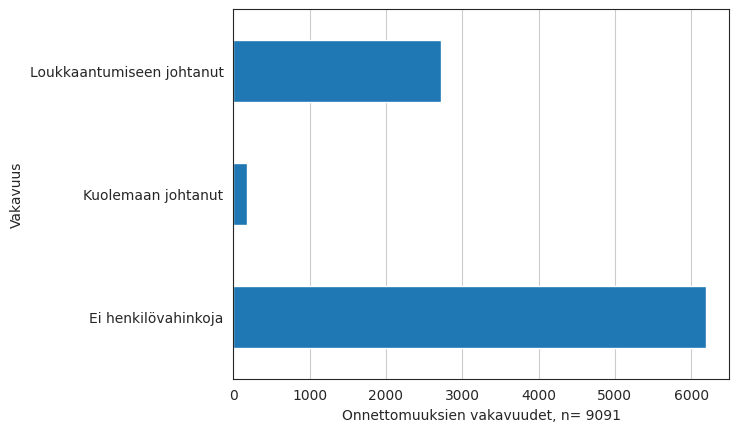

In [ ]:
# Luodaan palkkikaavio Onnettomuuksien vakavuuksille
# Määritään tyyli samalla
sns.set_style('white')

df_f1 = df_f.drop('Onnettomuuksia yhteensä')
df_f1['f'].plot(kind='barh')

plt.xlabel(f'Onnettomuuksien vakavuudet, n= {n}')

# Luodaan pysty
plt.grid(axis='x')

"""
Taulukosta huomataan valtaosassa onnettomuuksista ei ollut henkilövahinkoja.
Kuolemaan johtaneita onnettomuuksia on onneksi ollut suuhtessa muihin todella vähän
"""


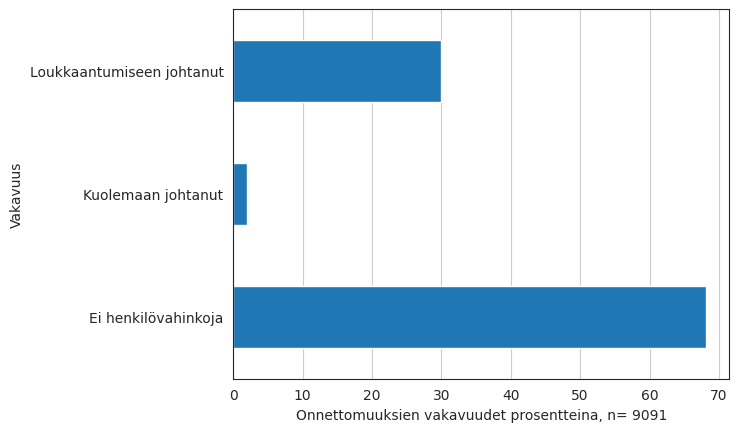

In [ ]:
# Prosentteina ilmoitettuna suhde
df_f1['%'].plot(kind='barh')

plt.xlabel(f'Onnettomuuksien vakavuudet prosentteina, n= {n}')

plt.grid(axis='x')

In [ ]:
# Luodaan frekvenssitaulukko Onnettomuusluokille

df_fl = pd.crosstab(df1['Onnettomuusluokka'], 'f')

nluokat = df_fl['f'].sum()

df_fl['%'] = df_fl['f']/nluokat*100



# poistetaan muuttujien otsikko col_0

df_fl.columns.name = None
df_fl.style.format({'f': '{:.0f}', '%':'{:.1f} %'})

,f,%
Onnettomuusluokka,,
hirvionnettomuus,1277,14.0 %
jalankulkijaonnettomuus,343,3.8 %
kohtaamisonnettomuus,411,4.5 %
kääntymisonnettomuus,654,7.2 %
mopedionnettomuus,247,2.7 %
muu eläinonnettomuus,79,0.9 %
muu onnettomuus,919,10.1 %
ohitusonnettomuus,514,5.7 %
peräänajo-onnettomuus,926,10.2 %


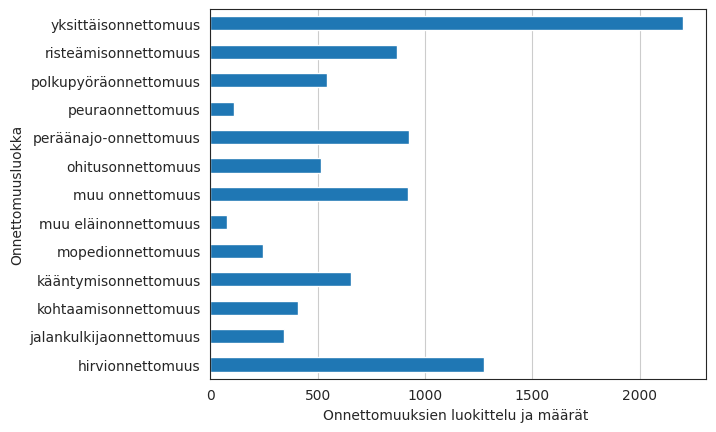

In [ ]:
# Luodaan palkkikaavio onnettomuuksien luokille

df_fl['f'].plot(kind='barh')
plt.xlabel('Onnettomuuksien luokittelu ja määrät ')
plt.grid(axis='x')

"""
Kaaviosta huomataan että suurin osa onnettomuuksista tapahtuu yksittäisonnettomuuksina,
.
Toiseksi suurin tekijä on hirvieläimet
"""

In [ ]:
# Selvitetään ajoradan kunto onnettomuuksissa
df_fr = pd.crosstab(df1['Pinta'],'f')
df_fr

col_0,f
Pinta,
-,920
ajourat paljaat,198
jäinen,1393
luminen,1100
"paljas, kuiva",3952
"paljas, märkä",1228
sohjoinen,254
urissa vettä,46


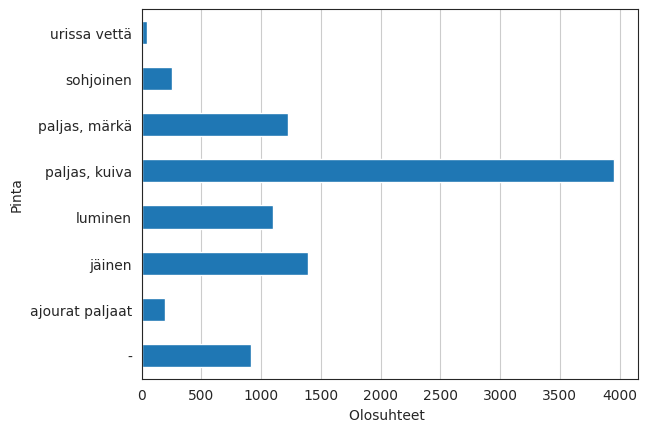

In [ ]:
df_fr['f'].plot(kind='barh')
plt.xlabel('Olosuhteet ')
plt.grid(axis='x')
"""
Kaaviosta huomataan että suuri osa onnettomuuksista tapahtuu kuivalla/paljaalla
ajoradalla.
"""

In [ ]:
# SElvitetään valoisuus olosuhteita onnettomuuksissa
df_fvalo = pd.crosstab(df1['Valoisuus'],'f')
df_fvalo

col_0,f
Valoisuus,
hämärä,748
pimeä (valaisematon),1416
päivänvalo,5274
tie valaistu,1646


'\nKuten kaaviosta nähdään eniten onnettomuuksia tapahtuu päivällä, jolloin ajorata \non hyvin valaistu. Tästä voidaan päätellä että huono valaisuus ei ole merkittävässä \nroolissa.\n'

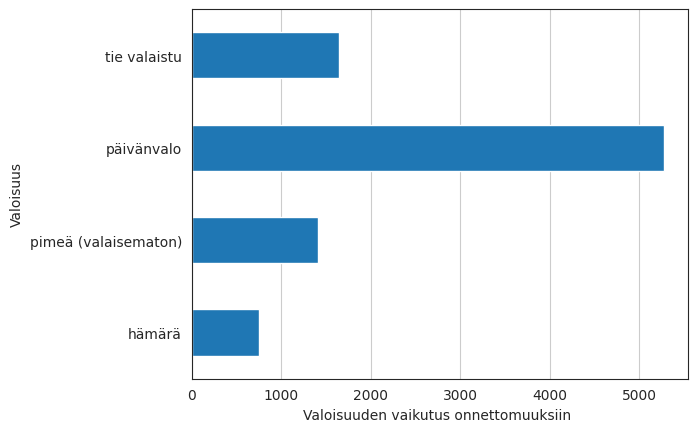

In [ ]:
df_fvalo['f'].plot(kind='barh')
plt.xlabel('Valoisuuden vaikutus onnettomuuksiin ')
plt.grid(axis='x')
"""
Kuten kaaviosta nähdään eniten onnettomuuksia tapahtuu päivällä, jolloin ajorata
on hyvin valaistu. Tästä voidaan päätellä että huono valaisuus ei ole merkittävässä
roolissa.
"""

In [ ]:
# Selvitetään sää-olosuhteita onnettomuuksissa
df_fsaa = pd.crosstab(df1['Sää'],'f')
df_fsaa

col_0,f
Sää,
kirkas,3663
lumisade,760
pilvipouta,3056
raesade,760
räntäsade,139
sumu,67
vesisade,646


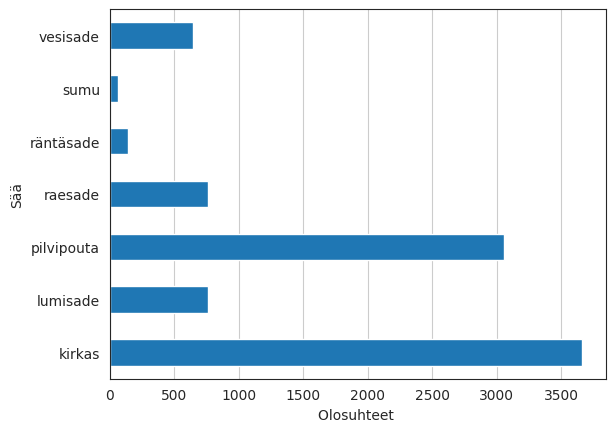

In [ ]:
df_fsaa['f'].plot(kind='barh')
plt.xlabel('Olosuhteet ')
plt.grid(axis='x')

"""
Huomataan että kirkaalla tapahtuu eniten onnettomuuksia.
"""

### Ristiintaulukointi


In [ ]:
df1.count()

,0
OnnettomuusID,9091
Tienpitäjä,9091
Tieosoite,9091
Ajorata,9091
Tie,9091
Osa,9091
Etaisyys,9091
Liikennevalot,9091
ELY-keskus,5966
Maakunta,5191


In [ ]:
# SElvitetään mitkä onnettomuuksista ovat johtaneet eri vahinkoihin
df_risti = pd.crosstab(df1['Vakavuus'],df1['Onnettomuusluokka'])
df_risti

Onnettomuusluokka,hirvionnettomuus,jalankulkijaonnettomuus,kohtaamisonnettomuus,kääntymisonnettomuus,mopedionnettomuus,muu eläinonnettomuus,muu onnettomuus,ohitusonnettomuus,peräänajo-onnettomuus,peuraonnettomuus,polkupyöräonnettomuus,risteämisonnettomuus,yksittäisonnettomuus
Vakavuus,,,,,,,,,,,,,
Ei henkilövahinkoja,1200,36,208,463,41,77,819,440,678,83,74,634,1437
Kuolemaan johtanut,1,22,42,7,1,0,6,6,2,2,19,5,61
Loukkaantumiseen johtanut,76,285,161,184,205,2,94,68,246,24,450,229,703


In [ ]:
# Tarksitetaan onnettomuusvakavuuksia onnettomuusluokittain. Prosentuaalisesti

df_ristiluokka = pd.crosstab(df1['Vakavuus'],df1['Onnettomuusluokka'], normalize='index')*100
# Lasketaan onnettimuusluokittaiset lkm
"""
n_hirvi = df_risti['hirvionnettomuus'].sum()
n_jalka = df_risti['jalankulkijaonnettomuus'].sum()
n_koht = df_risti['kohtaamisonnettomuus'].sum()
n_kaan = df_risti['kääntymisonnettomuus'].sum()
n_moped = df_risti['mopedionnettomuus'].sum()
n_muue = df_risti['muu eläinonnettomuus'].sum()
n_muu = df_risti['muu onnettomuus'].sum()
n_ohitus = df_risti['ohitusonnettomuus'].sum()
n_pera = df_risti['peräänajo-onnettomuus'].sum()
n_peura = df_risti['peuraonnettomuus'].sum()
n_polk = df_risti['polkupyöräonnettomuus'].sum()
n_rist = df_risti['risteämisonnettomuus'].sum()
n_yksittais = df_risti['yksittäisonnettomuus'].sum()

df_ristiluokka.columns = [f'Hirvionnettomuus, n={n_hirvi}',
                          f'Jalankilkijaonnettomuus, n={n_jalka}',
                          f'Kohtaamisonnettomuus, n={n_koht}',
                          f'Kääntymisonnettomuus, n={n_kaan}',
                          f'Mopedionnettomuus, n={n_moped}',
                          f'Muu eläinonnettomuus, n={n_muue}',
                          f'Muu onnettomuus, n={n_muu}',
                          f'Ohitusonnettomuus, n={n_ohitus}',
                          f'Peräänajo-onnettomuus, n={n_pera}',
                          f'Peuraonnettomuus, n={n_peura}',
                          f'Polkupyöräonnettomuus, n={n_polk}',
                          f'Risteämisonnettomuus, n={n_rist}',
                          f'Yksittäisonnettomuus, n={n_yksittais}']
"""

n_ei = df_risti.loc['Ei henkilövahinkoja',:].sum()
n_ku = df_risti.loc['Kuolemaan johtanut',:].sum()
n_lo = df_risti.loc['Loukkaantumiseen johtanut',:].sum()

df_ristiluokka.index = [f'Ei henkilövahinkoja, n={n_ei}', f'Kuolemaan johtanut, n={n_ku}',
                        f'Loukkaantumiseen johtanut, n={n_lo}']
df_ristiluokka.style.format('{:.2f} %')



Onnettomuusluokka,hirvionnettomuus,jalankulkijaonnettomuus,kohtaamisonnettomuus,kääntymisonnettomuus,mopedionnettomuus,muu eläinonnettomuus,muu onnettomuus,ohitusonnettomuus,peräänajo-onnettomuus,peuraonnettomuus,polkupyöräonnettomuus,risteämisonnettomuus,yksittäisonnettomuus
"Ei henkilövahinkoja, n=6190",19.39 %,0.58 %,3.36 %,7.48 %,0.66 %,1.24 %,13.23 %,7.11 %,10.95 %,1.34 %,1.20 %,10.24 %,23.21 %
"Kuolemaan johtanut, n=174",0.57 %,12.64 %,24.14 %,4.02 %,0.57 %,0.00 %,3.45 %,3.45 %,1.15 %,1.15 %,10.92 %,2.87 %,35.06 %
"Loukkaantumiseen johtanut, n=2727",2.79 %,10.45 %,5.90 %,6.75 %,7.52 %,0.07 %,3.45 %,2.49 %,9.02 %,0.88 %,16.50 %,8.40 %,25.78 %


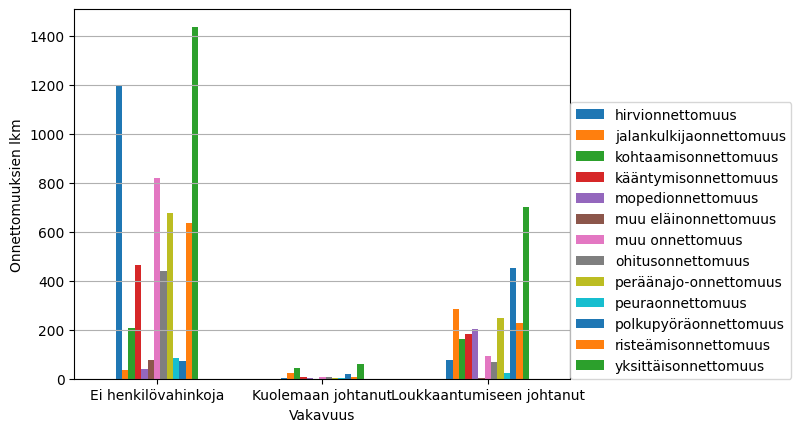

In [ ]:
# Luodaan pylväskaavio havainnollistamiseen
df_risti.plot(kind='bar', rot=0)

#Lisätään y-akselille otsikko ja vaakaviivat
plt.ylabel('Onnettomuuksien lkm')
plt.grid(axis='y')

#siirretään selitelaatikko
plt.legend(loc=(1,0))

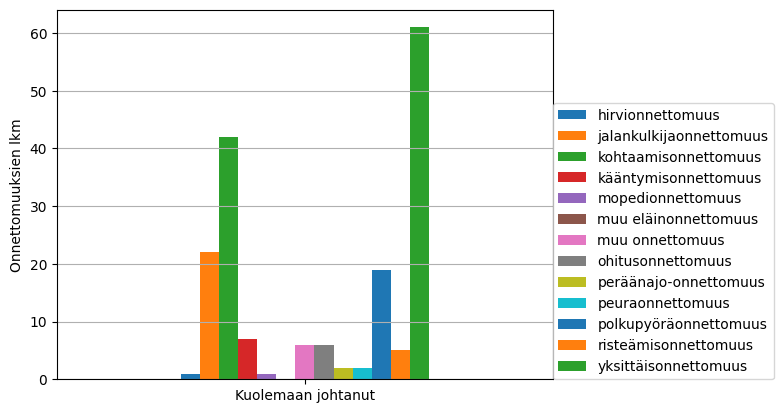

In [ ]:
# Kuolemaan johtaneet eivät oiekein näy kaaviossa, joten tehdään sille oma erillinen taulukko


df_ristiluokka_ku = pd.crosstab((df1['Vakavuus'] == 'Kuolemaan johtanut'),df1['Onnettomuusluokka'])

df_eiF = df_ristiluokka_ku.drop(False)
df_eiF.index = ['Kuolemaan johtanut']
df_eiF.plot(kind='bar', rot=0)

#Lisätään y-akselille otsikko ja vaakaviivat
plt.ylabel('Onnettomuuksien lkm')
plt.grid(axis='y')

#Siirretään selitelaatikko
plt.legend(loc=(1,0))


In [ ]:
# Tarksitetaan ajoratojen pintojen kuntoa onnettomuuksissa

df_ristiA = pd.crosstab(df1['Vakavuus'],df1['Pinta'])
df_ristiA


Pinta,-,ajourat paljaat,jäinen,luminen,"paljas, kuiva","paljas, märkä",sohjoinen,urissa vettä
Vakavuus,,,,,,,,
Ei henkilövahinkoja,800,135,1049,845,2339,809,191,22
Kuolemaan johtanut,24,9,11,14,85,22,8,1
Loukkaantumiseen johtanut,96,54,333,241,1528,397,55,23


In [ ]:


df_ristiAP = pd.crosstab(df1['Vakavuus'],df1['Pinta'], normalize='index')*100

n_eiAP = df_ristiA.loc['Ei henkilövahinkoja',:].sum()
n_kuAP = df_ristiA.loc['Kuolemaan johtanut',:].sum()
n_loAP = df_ristiA.loc['Loukkaantumiseen johtanut',:].sum()

df_ristiAP.index = [f'Ei henkilövahinkoja, n={n_eiAP}', f'Kuolemaan johtanut, n={n_kuAP}',
                        f'Loukkaantumiseen johtanut, n={n_loAP}']
df_ristiAP.style.format('{:.2f} %')

Pinta,-,ajourat paljaat,jäinen,luminen,"paljas, kuiva","paljas, märkä",sohjoinen,urissa vettä
"Ei henkilövahinkoja, n=6190",12.92 %,2.18 %,16.95 %,13.65 %,37.79 %,13.07 %,3.09 %,0.36 %
"Kuolemaan johtanut, n=174",13.79 %,5.17 %,6.32 %,8.05 %,48.85 %,12.64 %,4.60 %,0.57 %
"Loukkaantumiseen johtanut, n=2727",3.52 %,1.98 %,12.21 %,8.84 %,56.03 %,14.56 %,2.02 %,0.84 %


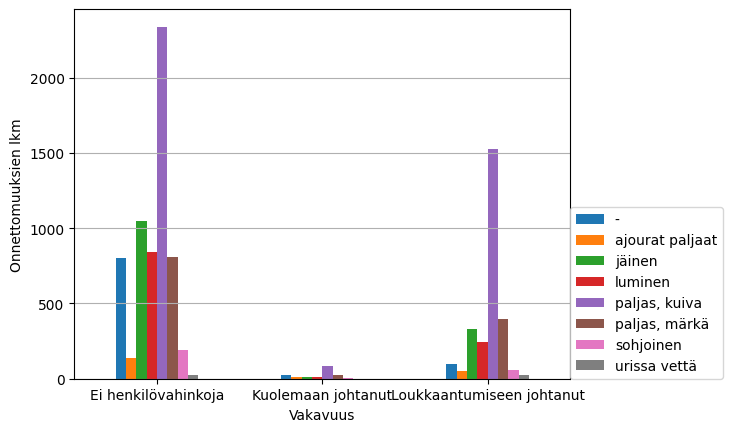

In [ ]:
# Luodaan pylväskaavio havainnollistamiseksi

df_ristiA.plot(kind='bar', rot=0)

#Lisätään y-akselille otsikko ja vaakaviivat
plt.ylabel('Onnettomuuksien lkm')
plt.grid(axis='y')
plt.legend(loc=(1,0))

### Pivot

In [ ]:
# Tarksitetaan eri onnettomuuksien määriä eri sääolosuhteissa

pivot = df1.pivot_table(index='Sää', columns='Onnettomuusluokka', values='Vakavuus', aggfunc='count')

pivot.style.format('{:.0f}',na_rep='-')

Onnettomuusluokka,hirvionnettomuus,jalankulkijaonnettomuus,kohtaamisonnettomuus,kääntymisonnettomuus,mopedionnettomuus,muu eläinonnettomuus,muu onnettomuus,ohitusonnettomuus,peräänajo-onnettomuus,peuraonnettomuus,polkupyöräonnettomuus,risteämisonnettomuus,yksittäisonnettomuus
Sää,,,,,,,,,,,,,
kirkas,309,154,155,292,131,13,393,206,429,32,313,371,865
lumisade,51,17,67,70,3,3,79,61,107,5,6,98,193
pilvipouta,321,112,142,226,89,14,333,181,297,21,173,316,831
raesade,527,9,5,8,7,48,20,11,11,44,15,11,44
räntäsade,6,5,11,11,-,-,13,13,17,1,1,18,43
sumu,10,1,4,4,2,-,9,2,4,2,1,6,22
vesisade,53,45,27,43,15,1,72,40,61,4,34,48,203
